# 2.4 数値流束

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

In [3]:
def init(q1, q2, dx, jmax):
    x = np.linspace(0, dx * (jmax - 1), jmax)
    q = np.array([(float(q1) if i < 0.5 * jmax else float(q2)) for i in range(jmax)])
    return (x, q)

## 数値流束を利用した整理 ($c>0$の場合)

各計算法の数値流束

In [4]:
def FTCS(q, c, dt, dx, j):
    return 0.5 * c * (q[j + 1] + q[j])  # 式(2.29)

In [5]:
def UPWIND1(q, c, dt, dx, j):
    return c * q[j]  # 式(2.30)

In [6]:
def LAX(q, c, dt, dx, j):
    nu2 = 1 / (c * dt / dx)
    return 0.5 * c * ((1 - nu2) * q[j + 1] + (1 + nu2) * q[j])  # 式(2.31)

In [7]:
def LAXWEN(q, c, dt, dx, j):
    nu = c * dt / dx
    return 0.5 * c * ((1 - nu) * q[j + 1] +(1 + nu) * q[j])  # 式(2.32)

メインループ（計算＋可視化）

In [8]:
def do_computing(x, q, c, dt, dx, nmax, ff):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ
    
    # 初期分布
    plt.plot(x, q, marker='o', lw=2, label='n=0') 
    
    for n in range(1, nmax + 1):
        qold = q.copy()
        for j in range(1, jmax - 1):
            ff1 = ff(qold, c, dt, dx, j)
            ff2 = ff(qold, c, dt, dx, j-1)
            q[j] = qold[j] - dt / dx * (ff1 - ff2)

        # 各ステップの可視化
        if n % 2 == 0:
            plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlim([0, 2])
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend()
    plt.show()

計算結果

1次精度風上差分法

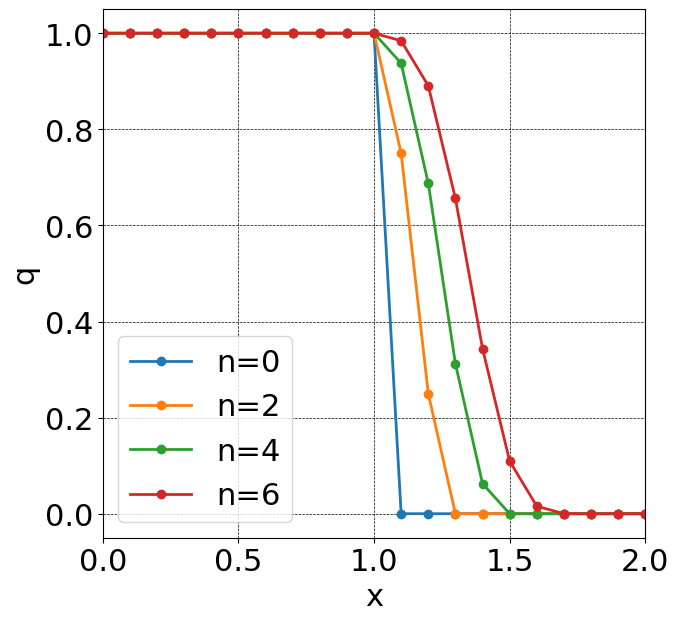

In [9]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, UPWIND1)

FTCS法

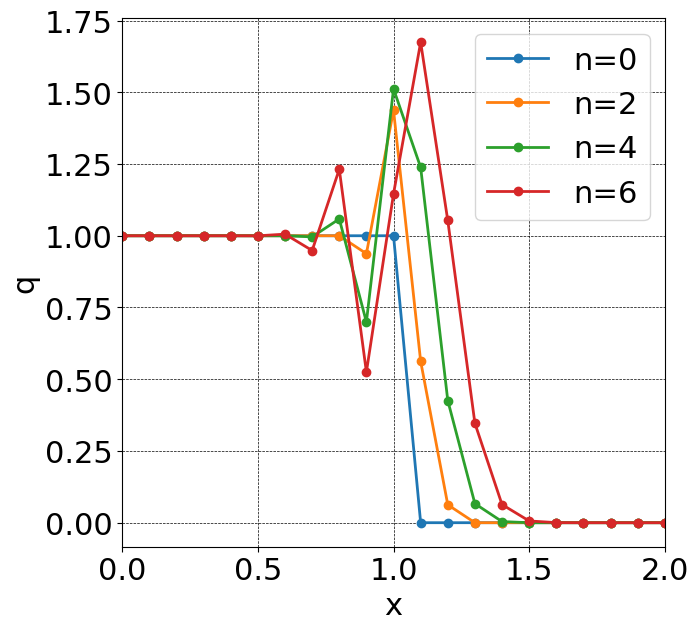

In [10]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, FTCS)

LAX法

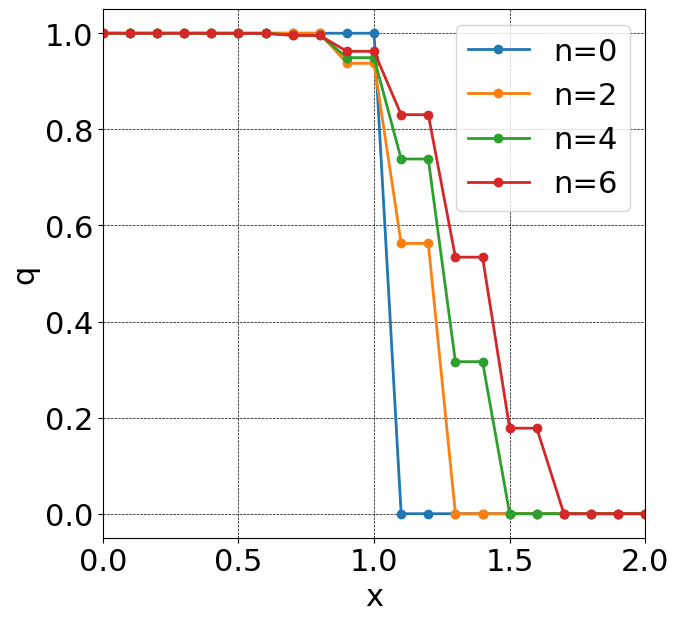

In [11]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAX)

Lax-Wendroff法

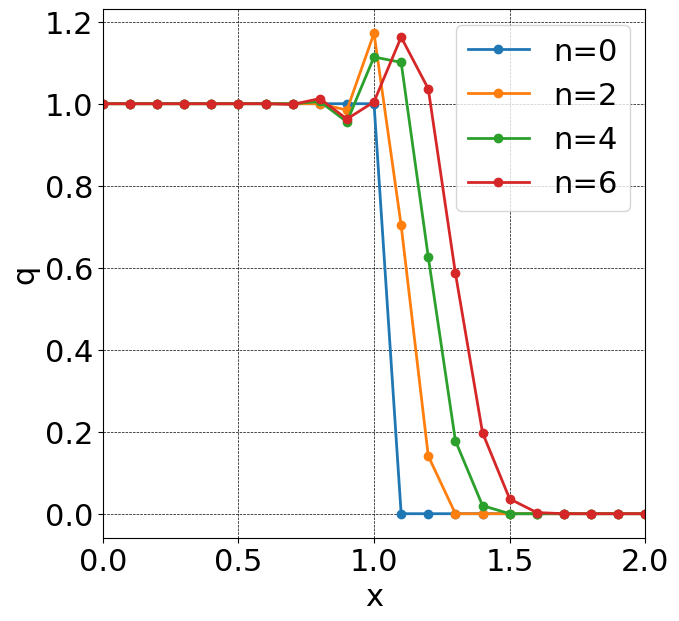

In [12]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAXWEN)

## 数値流束を利用した整理 (情報伝搬の方向が不明な場合)

1次精度風上差分法

In [13]:
def UPWIND1_mod(q, c, dt, dx, j):
    return 0.5 * ( c * (q[j + 1] + q[j]) - abs(c) * (q[j + 1] - q[j]))  # 式(2.33)

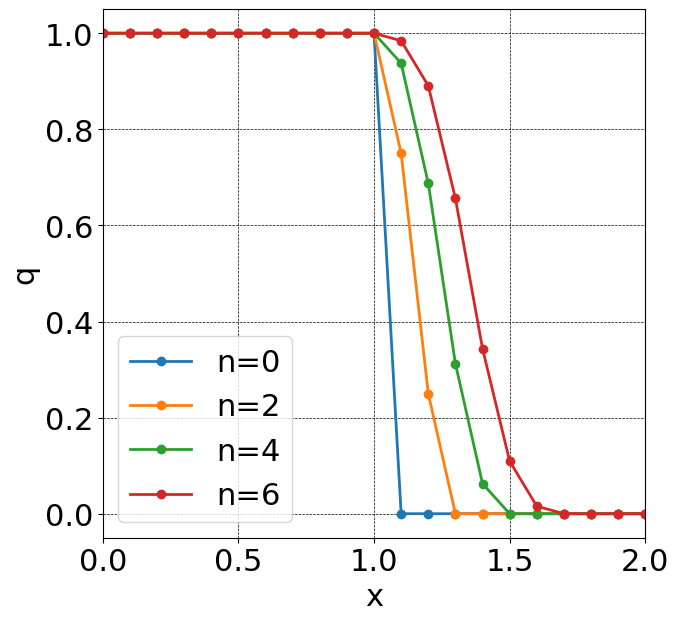

In [14]:
c = 1
q1, q2 = 1, 0
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, UPWIND1_mod)

FTCS法

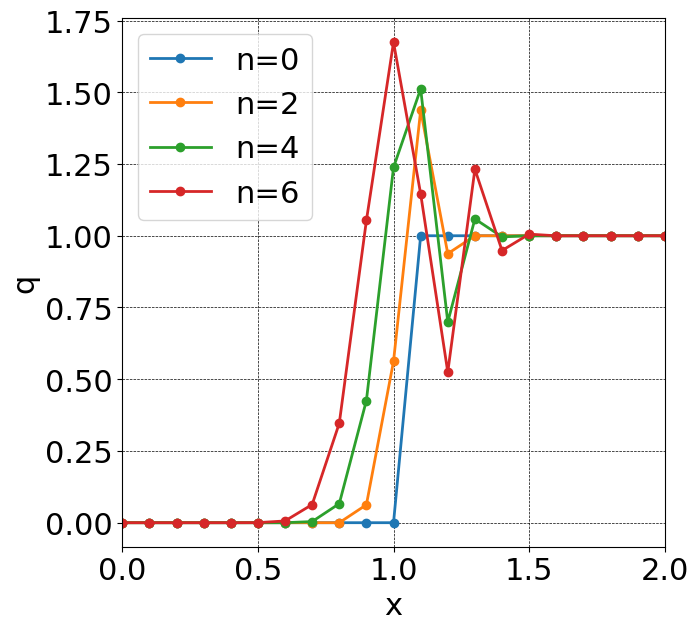

In [15]:
c = -1
q1, q2 = 0, 1
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, FTCS)

Lax法

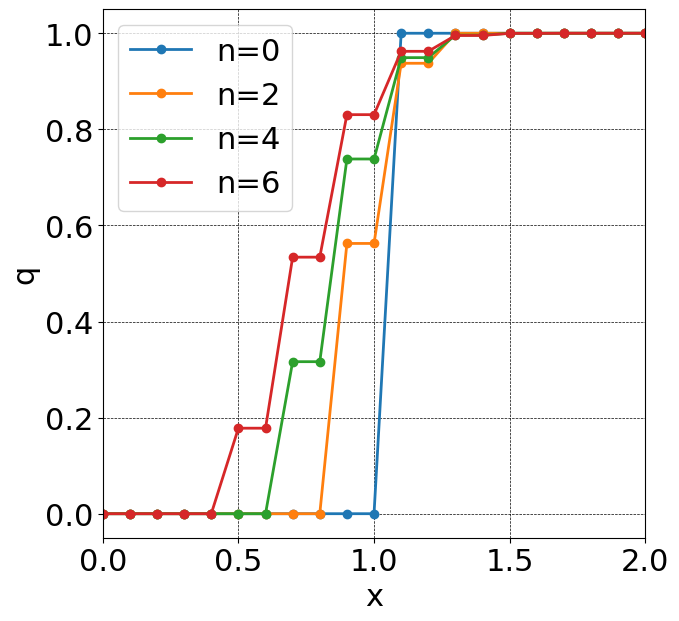

In [16]:
c = -1
q1, q2 = 0, 1
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAX)

Lax-Wendroff法

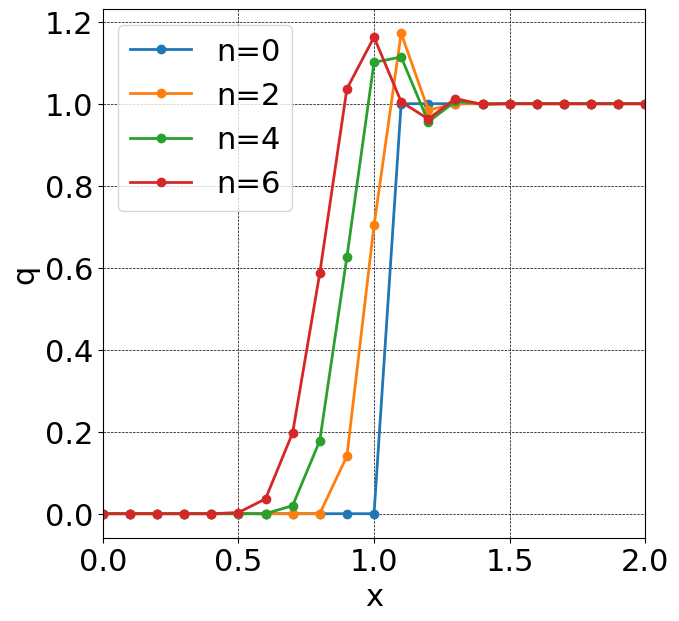

In [17]:
c = -1
q1, q2 = 0, 1
x, q = init(q1, q2, dx, jmax)
do_computing(x, q, c, dt, dx, nmax, LAXWEN)